Ejercicio clase 2017

El instante final de la combustión del propulsante del primer escalón de un lanzador, ocurre a los 40 segundos del instante inicial de su lanzamiento. A los 4 segundos de iniciado este lanzamiento y en su ascenso vertical, el sistema de guiado y control instantáneamente inclina 20 la trayectoria del centro de masas respecto a la vertical, en dirección del acimut requerido, cuando el cm tiene una velocidad de 160m/s a la altitud de 10.000 m. Simultáneamente, es iniciado un giro por gravedad, con empuje específico constante de valor 4 (tómese g0 = 9,8056 m/s2). Determínese la velocidad, inclinación de la misma respecto a la horizontal, alcance horizontal, y la altitud del centro de masas del lanzador en el instante final de la combustión del propulsante del primer escalón.

In [1]:
#primero importamos
import numpy as np
#importar numpy para calculo numérico
from sympy import *
#importar sympy para calculo simbolico
init_printing(use_latex=True)
from scipy import optimize

In [11]:
#declaramos variables
#Γ0 factor velocidad inicial [adim]
R0= symbols('Γ0')
#Γ0' factor de tiempo [adim]
R0prima= symbols("Γ0'")
#Γb factor velocidad final de combustión[adim]
Rb= symbols('Γb')
#Γb' factor de tiempo final de la combustión [adim]
Rbprima= symbols("Γb'")
#γ0 angulo inicial 1-beta [rad] cerca de 90º
y0= symbols("γo")
#γb angulo final de combustión[rad]
yb= symbols("γb")
#tiempo final de combustion [s]
tb= symbols("tb")
#V0 velocidad inicial de combustión [m/s]
V0= symbols("V0")
#Vb velocidad final de combustión [m/s]
Vb= symbols("Vb")
#xb posición tras combustión en x [m]
xb= symbols('xb')
#zb posción tras combustión en z [m]
zb= symbols('zb')
#r0 empuje específico
r0=symbols('r0')
#gravedad g0 [m/s**2]
g0=symbols('g0')


In [12]:
r0=4
y0=rad(90-2)
V0=160
g0=9.8056
t0=4
tb=40
x0=0
z0=10000

In [13]:
#calcular factor velocidad inicial
R0=(1/cos(y0))*((1-sin(y0))/(1+sin(y0)))**(r0/2)

#calcular factor tiempo inicial
R0prima=((r0+sin(y0))/(r0**2-1))*R0

#calcular factor tiempo final
Rbprima=R0prima+g0*R0*(tb-t0)/V0

#combinand la expresión del factor de tiempo y velocidad final, y preparandolo para iterar
Rb=(1/cos(yb))*((1-sin(yb))/(1+sin(yb)))**(r0/2)
f1=((r0+sin(yb))/(r0**2-1))*Rb-Rbprima
f1solve=lambdify(yb,f1)
#resolvemos para obtener yb
yb=optimize.newton(f1solve,1,tol=1.48e-10)

#calcular factor velocidad final
Rb=(1/cos(yb))*((1-sin(yb))/(1+sin(yb)))**(r0/2)

#calcular velocidad final
Vb=Rb*V0/R0

#calcular posiciones finales
zb=(V0**2/(g0*R0**2))*(1/(2*(r0**2-1)))*(Rb**2*(r0*sin(yb)+1-0.5*cos(yb)**2)-R0**2*(r0*sin(y0)+1-0.5*cos(y0)**2))+z0

xb=(V0**2/(g0*R0**2))*(1/(4*r0**2-1))*(Rb**2*cos(yb)*(2*r0+sin(yb))-R0**2*cos(y0)*(2*r0+sin(y0)))+x0

In [14]:
print('Γ0=',R0.evalf(),'   ',"Γ0'=",R0prima.evalf())
print('Γb=',Rb.evalf(),'   ',"Γb'=",Rbprima.evalf(),"γb=",yb)
print('xb=',xb.evalf(),'m','   ','zb=',zb.evalf(),'m')

Γ0= 2.65990858122181e-6     Γ0'= 8.86528170777981e-7
Γb= 2.02744873092997e-5     Γb'= 6.75497807718442e-6 γb= 1.5021397703978412
xb= 1473.12953192305 m     zb= 34785.8169353872 m


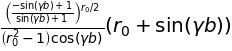

In [7]:
yb= symbols("γb")
r0=symbols("r0")
Rbprima=((r0+sin(yb))/(r0**2-1))*((1/cos(yb))*((1-sin(yb))/(1+sin(yb)))**(r0/2))
Rbprima

In [9]:
Vb.evalf()
